In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os, glob, subprocess, random, time
from IPython.display import display, HTML
mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import networkx as nx
try:
    print(open('README.md').read())
except:
    pass
print('-'*100)
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        if 'git' in str(root):
            continue
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
list_files('.')

def prints(txt):
    txt = str(txt)
    try:
        print(txt[:1000])
    except:
        pass
    #print(txt)


# LumPy
[![License: GPL v3](https://img.shields.io/badge/License-GPL%20v3-blue.svg)](http://www.gnu.org/licenses/gpl-3.0)
[![Build Status](https://travis-ci.org/gerritgr/LumPyQest.svg?branch=master)](https://travis-ci.org/gerritgr/LumPyQest)

Copyright: 2018, Gerrit Großmann, [Group of Modeling and Simulation](https://mosi.uni-saarland.de/) at [Saarland University](http://www.cs.uni-saarland.de/)

Version: 0.1 (Please note that this code is an experimental version in a very early development stage.)
## Overview
------------------
The LumPy toolset provides a proof of concept for lumping for AME equations for multistate processes on complex networks.
It reduces the large number of ODEs given by the equation systems by clustering them and only solving a single ODE per cluster.
LumPy is written in Python 3 (requiring SciPy) and published under GPL v3 license.

As input, the tool takes model descriptions (containing degree distribution, rules,
time horizon, etc.) and outputs the lumped (o

In [2]:
clustering_file = 'output/SIS/clustering_SIS_306.csv'
clustering_original_file = 'output/SISfull/clustering_SISfull_1326.csv'
dynamics_original_file = 'output/SISfull/ame_SISfull_1326_trajectories_individual.csv'
dynamics_reduced_file = 'output/SIS/ame_SIS_306_trajectories_individual.csv'  #73

clustering_file = 'output/SIS/clustering_SIS_73.csv'
dynamics_reduced_file = 'output/SIS/ame_SIS_73_trajectories_individual.csv'  #73

clustering = pd.read_csv(clustering_file, skiprows=1, sep=';') 
clustering_original = pd.read_csv(clustering_original_file, skiprows=1, sep=';') 
dynamics_original = pd.read_csv(dynamics_original_file, skiprows=1, sep=';')  #open(dynamics_original_file).read()
dynamics_reduced = pd.read_csv(dynamics_reduced_file, skiprows=1, sep=';')  #open(dynamics_reduced_file).read()



In [3]:
clustering_original.head()
len(set(list(clustering['cluster'])))

73

# Funtion m to cluster and vice versa

In [4]:
def get_cluster_maps(clustering):
    try:
        clustering = clustering.to_dict(orient='records')
    except: 
        pass
    
    m_to_cluster = dict()
    cluster_to_m = dict()
    m_to_weight = dict()
    for line in clustering:
        m = eval(line['m'])
        cluster = line['cluster']
        weight = line['weight']
        m_to_cluster[m] = cluster
        m_to_weight[m] = weight
        if cluster not in cluster_to_m:
            cluster_to_m[cluster] = list()
        cluster_to_m[cluster].append(m)
    return m_to_cluster, cluster_to_m, m_to_weight

# Plot Original

### 2652 ODEs and 1326 cluster

In [5]:
print(clustering_original.head())
m_to_cluster, cluster_to_m, m_to_weight = get_cluster_maps(clustering_original)
print(str(cluster_to_m)[:1000])

          m               cluster  weight
0    (7, 3)  (10, (699.0, 300.0))     1.0
1   (31, 6)  (37, (837.0, 162.0))     1.0
2   (5, 31)  (36, (138.0, 861.0))     1.0
3  (20, 25)  (45, (444.0, 555.0))     1.0
4   (3, 35)   (38, (78.0, 921.0))     1.0
{'(10, (699.0, 300.0))': [(7, 3)], '(37, (837.0, 162.0))': [(31, 6)], '(36, (138.0, 861.0))': [(5, 31)], '(45, (444.0, 555.0))': [(20, 25)], '(38, (78.0, 921.0))': [(3, 35)], '(25, (639.0, 360.0))': [(16, 9)], '(34, (176.0, 823.0))': [(6, 28)], '(49, (428.0, 571.0))': [(21, 28)], '(40, (99.0, 900.0))': [(4, 36)], '(23, (826.0, 173.0))': [(19, 4)], '(46, (934.0, 65.0))': [(43, 3)], '(37, (459.0, 540.0))': [(17, 20)], '(32, (218.0, 781.0))': [(7, 25)], '(41, (536.0, 463.0))': [(22, 19)], '(27, (740.0, 259.0))': [(20, 7)], '(48, (916.0, 83.0))': [(44, 4)], '(37, (486.0, 513.0))': [(18, 19)], '(49, (469.0, 530.0))': [(23, 26)], '(27, (777.0, 222.0))': [(21, 6)], '(13, (615.0, 384.0))': [(8, 5)], '(34, (941.0, 58.0))': [(32, 2)], '(45, (288.0,

In [6]:
dynamics_original.head()

,"('I', '(0, (0.0, 999.0))')","('I', '(1, (0.0, 999.0))')","('I', '(1, (999.0, 0.0))')","('I', '(10, (0.0, 999.0))')","('I', '(10, (199.0, 800.0))')","('I', '(10, (299.0, 700.0))')","('I', '(10, (399.0, 600.0))')","('I', '(10, (499.0, 500.0))')","('I', '(10, (599.0, 400.0))')","('I', '(10, (699.0, 300.0))')",...,"('S', '(9, (0.0, 999.0))')","('S', '(9, (111.0, 888.0))')","('S', '(9, (222.0, 777.0))')","('S', '(9, (333.0, 666.0))')","('S', '(9, (444.0, 555.0))')","('S', '(9, (555.0, 444.0))')","('S', '(9, (666.0, 333.0))')","('S', '(9, (777.0, 222.0))')","('S', '(9, (888.0, 111.0))')","('S', '(9, (999.0, 0.0))')"
0,7.464749e-11,0.067183,0.007465,8.230767e-05,0.000046,0.000014,0.000003,3.512597e-07,3.252405e-08,2.065019e-09,...,0.001071,0.001071,0.000476,0.000123,0.000021,0.000002,1.693005e-07,8.061929e-09,2.239425e-10,2.764722e-12
1,7.136282e-11,0.052267,0.030967,1.030474e-05,0.000160,0.000160,0.000100,4.285951e-05,1.274047e-05,2.611262e-06,...,0.000600,0.000889,0.000586,0.000227,0.000057,0.000010,1.097069e-06,8.416672e-08,4.013849e-09,9.346394e-11
2,6.822267e-11,0.041662,0.053330,2.126014e-06,0.000150,0.000227,0.000224,1.565866e-04,7.852179e-05,2.776193e-05,...,0.000340,0.000650,0.000555,0.000280,0.000093,0.000022,3.843804e-06,5.232218e-07,5.188697e-08,2.749108e-09
3,6.522070e-11,0.034487,0.074257,9.199038e-07,0.000120,0.000223,0.000284,2.652625e-04,1.841542e-04,9.230811e-05,...,0.000207,0.000460,0.000459,0.000273,0.000110,0.000033,8.451928e-06,1.857919e-06,3.054601e-07,2.578077e-08
4,6.235083e-11,0.029845,0.093532,5.771082e-07,0.000091,0.000193,0.000287,3.275440e-04,2.859434e-04,1.843058e-04,...,0.000136,0.000328,0.000358,0.000236,0.000108,0.000040,1.383653e-05,4.349116e-06,9.995462e-07,1.144244e-07


In [8]:
os.system('mkdir gif_out')

def plot_dyn(m_to_value, title='Original I Fraction', t=0.3, clusters=100):
    import matplotlib.cm as cm
    x_list = list()
    y_list = list()
    value_list = list()
    clusters = len(set(m_to_value.values())) #does not work, need to use clusters
    
    for m, value in m_to_value.items():
        x_list.append(m[0])
        y_list.append(m[1])
        value_list.append(value)
        
        
    value_list = [np.log(n+0.0000000001) for n in value_list]    
    #plt.scatter(x_list, y_list, c=value_list, cmap='hot')
    #plt.title(title)
    #plt.show()
    #plt.savefig('gif_out/'+title.replace(' ','')+'.jpg')
    
    
    ax = plt.gca()
    ax.scatter(x_list, y_list, c=value_list, alpha=0.9, linewidths=0.0, cmap=cm.plasma, marker=',', s=16)
    ax.set_xlim([-0.5, 55])
    ax.set_ylim([-0.5, 55])
    ax.set_aspect(1.0)
    ax.set(xlabel='Neighbors in state I', ylabel='Neighbors in state S')
    t = str(t)
    t += '000000000'
    t = t[:5]
    plt.title('Probability Mass at t={}, {} clusters'.format(t,clusters))
    plt.savefig('gif_out/'+title.replace(' ','')+'.jpg' , dpi=1000)
    

In [ ]:
m_to_value_t = dict()
for timepoint in list(range(101)):
    dynamics_original   #101 rows × 2652 columns
    dyn_o =  dynamics_original.to_dict(orient='records')
    dyn_line = dyn_o[timepoint]
    m_to_value = dict()
    for cluster, value in dyn_line.items():
        if 'S' in cluster:
            continue
        cluster = cluster.replace("('I', '", "").replace("')","")
        mlist = cluster_to_m[cluster]
        for m in mlist:   # do weights
            m_to_value[m] = value
    prints(m_to_value) 
    m_to_value_t[timepoint] = dict(m_to_value)

    real_time = str(timepoint/101.0*3) + '00000000000000000000'
    real_time = real_time[:6]
    plot_dyn(m_to_value, 'Original Inf   t='+real_time, timepoint/101.0*3)

{(0, 0): 7.464749463148459e-11, (0, 1): 0.06718274516833614, (1, 0): 0.007464749463148461, (0, 10): 8.230767434916922e-05, (2, 8): 4.572648574953849e-05, (3, 7): 1.3548588370233603e-05, (4, 6): 2.634447738656541e-06, (5, 5): 3.5125969848753935e-07, (6, 4): 3.252404615625367e-08, (7, 3): 2.065018803571661e-09, (8, 2): 8.604245014881892e-11, (9, 1): 2.124504941946136e-12, (1, 9): 9.14529714990768e-05, (10, 0): 2.3605610466068345e-14, (0, 11): 5.837153675187414e-05, (2, 9): 3.963499409077874e-05, (3, 8): 1.3211664696926233e-05, (4, 7): 2.9359254882058386e-06, (5, 6): 4.5669952038757497e-07, (6, 5): 5.074439115417505e-08, (7, 4): 4.027332631283742e-09, (8, 3): 2.2374070173798472e-10, (9, 2): 8.286692656962395e-12, (1, 10): 7.134298936340169e-05, (10, 1): 1.841487257102758e-13, (11, 0): 1.86008813848764e-15, (0, 12): 4.226415927827759e-05, (2, 10): 3.443746311563347e-05, (3, 9): 1.2754615968753153e-05, (4, 8): 3.1886539921882874e-06, (5, 7): 5.668718208334756e-07, (6, 6): 7.348338418211695e

{(0, 0): 4.978814792505536e-11, (0, 1): 0.025150360195919333, (1, 0): 0.1648398020747578, (0, 10): 9.977788006726225e-08, (2, 8): 1.916924685987083e-05, (3, 7): 4.977041286994973e-05, (4, 6): 0.00010830028811126658, (5, 5): 0.00021386899793863256, (6, 4): 0.0003645573957992809, (7, 3): 0.0004908431096215705, (8, 2): 0.0004737646010432444, (9, 1): 0.0002868040557190021, (1, 9): 4.483775640878049e-06, (10, 0): 8.117241989433969e-05, (0, 11): 4.2242146290395805e-08, (2, 9): 9.303612874284516e-06, (3, 8): 2.4458134373753283e-05, (4, 7): 5.318312480528961e-05, (5, 6): 0.0001078434611355338, (6, 5): 0.00020035677393238303, (7, 4): 0.00031590585468805455, (8, 3): 0.0003891163434993416, (9, 2): 0.00034274077383880365, (1, 10): 2.0907557938255463e-06, (10, 1): 0.00018976660678686222, (11, 0): 4.93270066847845e-05, (0, 12): 1.8527829517924202e-08, (2, 10): 4.646908016955649e-06, (3, 9): 1.2415317330701123e-05, (4, 8): 2.6839623379373354e-05, (5, 7): 5.452464119420256e-05, (6, 6): 0.0001060170387

{(0, 0): 3.3207540144705253e-11, (0, 1): 0.03069736256497428, (1, 0): 0.22351752590580037, (0, 10): 8.474993834805025e-09, (2, 8): 1.5475434046633629e-06, (3, 7): 3.670427432590849e-06, (4, 6): 1.057684190959021e-05, (5, 5): 3.820235285453157e-05, (6, 4): 0.00013069714056838225, (7, 3): 0.000347255611035374, (8, 2): 0.0006388626096689032, (9, 1): 0.0007157561475910553, (1, 9): 4.7482911339402637e-07, (10, 0): 0.0003666931757186821, (0, 11): 3.0802861672818692e-09, (2, 9): 6.271051507723815e-07, (3, 8): 1.3717658999040783e-06, (4, 7): 3.316022157184238e-06, (5, 6): 1.0974435183230088e-05, (6, 5): 4.0460168528611844e-05, (7, 4): 0.0001288919291927546, (8, 3): 0.0003105476635218416, (9, 2): 0.0005171968909674975, (1, 10): 1.9015918551979036e-07, (10, 1): 0.0005271910652704137, (11, 0): 0.000247311820733182, (0, 12): 1.1624705233258706e-09, (2, 10): 2.6492494340426686e-07, (3, 9): 5.567853772897709e-07, (4, 8): 1.1572785676189507e-06, (5, 7): 3.268006511881938e-06, (6, 6): 1.19650661737130

# Plot Reduced 

{'(6, (6.0, 3.0))': [(7, 3), (6, 3)], '(9, (8.0, 1.0))': [(31, 6), (36, 8), (34, 8), (33, 4), (38, 5), (27, 6), (29, 4), (42, 6), (36, 4), (25, 3), (35, 8), (33, 8), (38, 9), (25, 4), (26, 3), (30, 5), (42, 8), (43, 5), (44, 6), (32, 4), (34, 6), (39, 5), (27, 3), (28, 4), (40, 6), (41, 7), (22, 5), (35, 5), (36, 6), (37, 7), (24, 4), (26, 6), (31, 5), (41, 8), (43, 7), (45, 5), (32, 6), (33, 7), (34, 4), (37, 9), (38, 6), (39, 7), (27, 5), (28, 6), (29, 7), (23, 5), (40, 8), (41, 5), (35, 7), (37, 5), (26, 4), (30, 6), (31, 7), (39, 8), (33, 5), (29, 5), (38, 8), (25, 5), (30, 4), (44, 5), (40, 5), (42, 7), (36, 5), (24, 3), (41, 9), (32, 5), (34, 7), (28, 5), (40, 7), (41, 6), (42, 5), (35, 4), (36, 7), (37, 6), (24, 5), (31, 4), (39, 9), (43, 6), (32, 7), (33, 6), (34, 5), (37, 8), (38, 7), (39, 6), (27, 4), (29, 6), (23, 4), (40, 9), (35, 6), (25, 6), (26, 5), (30, 7)], '(9, (1.0, 8.0))': [(5, 31), (6, 28), (5, 24), (4, 35), (8, 38), (5, 34), (9, 39), (6, 41), (5, 43), (9, 40), (6,

{(0, 0): 4.817860325259224e-11, (0, 1): 0.02408930162629612, (1, 0): 0.1626175159546712, (0, 2): 0.0018811711174258649, (1, 1): 0.02212531065875315, (2, 0): 0.028048791590334802, (0, 3): 0.00029995790577368175, (1, 2): 0.004830766077314547, (2, 1): 0.010760278697121588, (3, 0): 0.008532579659104715, (0, 4): 6.513368160243717e-05, (1, 3): 0.0013163617338850923, (2, 2): 0.0038594529324330485, (3, 1): 0.0054880731994316, (4, 0): 0.0033265992021254093, (0, 5): 1.3719742990945007e-05, (0, 6): 7.454972935827357e-06, (1, 4): 0.00035284857926280315, (1, 5): 0.00019172929191060202, (2, 3): 0.0012621900613743414, (2, 4): 0.0006858432226920206, (3, 3): 0.003777935690133439, (3, 2): 0.003991651511011668, (4, 2): 0.005309816905291105, (4, 1): 0.004558534002156289, (5, 1): 0.004820686450122375, (6, 0): 0.0007752739307929746, (5, 0): 0.0014267736676737979, (0, 7): 1.319237722814635e-06, (0, 8): 8.398286213664251e-07, (1, 6): 4.530220374423299e-05, (1, 7): 2.883944770333551e-05, (2, 5): 0.000195883154

{(0, 0): 6.350887191512215e-11, (0, 1): 0.03175443595756108, (1, 0): 0.241403672543399, (0, 2): 0.0017928435525080973, (1, 1): 0.023224369264621403, (2, 0): 0.05108663017040679, (0, 3): 0.000177368861637858, (1, 2): 0.0032146675430430437, (2, 1): 0.01231694765204952, (3, 0): 0.018481987272869125, (0, 4): 2.3444490544715834e-05, (1, 3): 0.0005458020265009606, (2, 2): 0.002609262774808152, (3, 1): 0.007152724915915663, (4, 0): 0.008396947967171161, (0, 5): 2.701949883186132e-06, (0, 6): 1.4681735121721159e-06, (1, 4): 8.219348659543305e-05, (1, 5): 4.4661931238409896e-05, (2, 3): 0.00041026649813216107, (2, 4): 0.00022292878533297192, (3, 3): 0.0019207501302059922, (3, 2): 0.002689123512645715, (4, 2): 0.005180974231998363, (4, 1): 0.006401393665167538, (5, 1): 0.008983940568645479, (6, 0): 0.00235191660245519, (5, 0): 0.004328344529159676, (0, 7): 1.3313452387911808e-07, (0, 8): 8.475362833555472e-08, (1, 6): 5.555814838097769e-06, (1, 7): 3.53683967290737e-06, (2, 5): 2.597552060469717

{(0, 0): 7.007015744617975e-11, (0, 1): 0.03503507872308988, (1, 0): 0.27073966643921327, (0, 2): 0.0015911278080387719, (1, 1): 0.02232362756458588, (2, 0): 0.0610966715493844, (0, 3): 0.00011961995882837968, (1, 2): 0.0024182677101079585, (2, 1): 0.012040086344407829, (3, 0): 0.022792762013177845, (0, 4): 1.1724199116696982e-05, (1, 3): 0.00030851197232705386, (2, 2): 0.0019873679890583984, (3, 1): 0.007164820183160881, (4, 0): 0.01053137421895585, (0, 5): 9.138930020623923e-07, (0, 6): 4.96587115452071e-07, (1, 4): 3.151313074166514e-05, (1, 5): 1.7123464846051095e-05, (2, 3): 0.0002157171091938194, (2, 4): 0.00011721540351712295, (3, 3): 0.001208482226261647, (3, 2): 0.002148038290671267, (4, 2): 0.004218705213112153, (4, 1): 0.00665905946465503, (5, 1): 0.009221970414955406, (6, 0): 0.0030078744214165408, (5, 0): 0.00553553505372887, (0, 7): 2.7975588447379267e-08, (0, 8): 1.7809299621565052e-08, (1, 6): 1.3086540859027991e-06, (1, 7): 8.330910629696364e-07, (2, 5): 7.438450132284

{(0, 0): 7.261809397750879e-11, (0, 1): 0.036309046988754395, (1, 0): 0.28336250460336326, (0, 2): 0.001539193217636613, (1, 1): 0.02225541465927073, (2, 0): 0.06560617353717145, (0, 3): 0.00010370731119461263, (1, 2): 0.0021808260452832306, (2, 1): 0.012042073820511472, (3, 0): 0.024487972196946726, (0, 4): 8.820203481966427e-06, (1, 3): 0.00024285981276907744, (2, 2): 0.0018202867581614468, (3, 1): 0.007179981585969253, (4, 0): 0.01125151788794044, (0, 5): 5.448846359093761e-07, (0, 6): 2.96076990402336e-07, (1, 4): 1.9743973497653997e-05, (1, 5): 1.0728392519294907e-05, (2, 3): 0.00017497856832001348, (2, 4): 9.507907633812521e-05, (3, 3): 0.0010317957693489412, (3, 2): 0.0020439367501918567, (4, 2): 0.003885742072421132, (4, 1): 0.006775269914498619, (5, 1): 0.009103445441722743, (6, 0): 0.003196526760090279, (5, 0): 0.005882720968892376, (0, 7): 1.0899495329849293e-08, (0, 8): 6.938634317496165e-09, (1, 6): 5.348423242518908e-07, (1, 7): 3.404813886511289e-07, (2, 5): 4.5771091746

{(0, 0): 7.440270419978076e-11, (0, 1): 0.03720135209989038, (1, 0): 0.2907411616864466, (0, 2): 0.0015484494609564962, (1, 1): 0.022535542540379663, (2, 0): 0.06809104247332166, (0, 3): 9.950189714438559e-05, (1, 2): 0.002112704515762173, (2, 1): 0.012158719158266355, (3, 0): 0.025262086823851886, (0, 4): 7.922291295566808e-06, (1, 3): 0.00022088962137648764, (2, 2): 0.0017789802990875495, (3, 1): 0.007223895365084984, (4, 0): 0.011515518132675139, (0, 5): 4.352786364149313e-07, (0, 6): 2.3651976980609872e-07, (1, 4): 1.6031128637267277e-05, (1, 5): 8.7109233897801e-06, (2, 3): 0.00016452842384832704, (2, 4): 8.940072330605123e-05, (3, 3): 0.0009877641769974843, (3, 2): 0.002027281443748562, (4, 2): 0.0038000957134192445, (4, 1): 0.006829568215783744, (5, 1): 0.009068049350923629, (6, 0): 0.0032489328101018822, (5, 0): 0.005979166327382469, (0, 7): 6.65580443098732e-09, (0, 8): 4.237094621153456e-09, (1, 6): 3.338192816073993e-07, (1, 7): 2.125098321625726e-07, (2, 5): 3.9376290784843

{(0, 0): 7.595273795227962e-11, (0, 1): 0.03797636897613981, (1, 0): 0.29632821173718904, (0, 2): 0.0015711568611039358, (1, 1): 0.02285613589519559, (2, 0): 0.06971965837462185, (0, 3): 9.841689529380692e-05, (1, 2): 0.002091729359583453, (2, 1): 0.012274681765963823, (3, 0): 0.02567977049867168, (0, 4): 7.581709797447558e-06, (1, 3): 0.00021191891596167463, (2, 2): 0.0017701616264354195, (3, 1): 0.007262882940187739, (4, 0): 0.011625839939312075, (0, 5): 3.9476957678873313e-07, (0, 6): 2.145081371269414e-07, (1, 4): 1.4606550210859684e-05, (1, 5): 7.936842299424295e-06, (2, 3): 0.0001614733257601181, (2, 4): 8.774065769265546e-05, (3, 3): 0.0009778849066645087, (3, 2): 0.002027476922774128, (4, 2): 0.003785575928215408, (4, 1): 0.0068543996666159375, (5, 1): 0.009069398841861729, (6, 0): 0.0032627353984147223, (5, 0): 0.006004567890324692, (0, 7): 5.3812577050512e-09, (0, 8): 3.425716352325387e-09, (1, 6): 2.7231337249753533e-07, (1, 7): 1.7335508244588062e-07, (2, 5): 3.773153747190

{(0, 0): 7.735748572808449e-11, (0, 1): 0.03867874286404224, (1, 0): 0.3010856534630455, (0, 2): 0.0015937757082662791, (1, 1): 0.023135075227039864, (2, 0): 0.0708816598726419, (0, 3): 9.824651000530103e-05, (1, 2): 0.002085317974554455, (2, 1): 0.012365730791327068, (3, 0): 0.025926504889572686, (0, 4): 7.440259834962028e-06, (1, 3): 0.00020785895867637987, (2, 2): 0.0017704067704093233, (3, 1): 0.00729135126097229, (4, 0): 0.011674481083004977, (0, 5): 3.788194609434473e-07, (0, 6): 2.0584123410781085e-07, (1, 4): 1.4023555473367125e-05, (1, 5): 7.620057211496241e-06, (2, 3): 0.0001607224982338927, (2, 4): 8.733267637032465e-05, (3, 3): 0.0009777102754429964, (3, 2): 0.0020313909670077934, (4, 2): 0.003790226074263312, (4, 1): 0.006866967174000836, (5, 1): 0.0090786571851962, (6, 0): 0.003264416894952623, (5, 0): 0.00600766242876752, (0, 7): 4.985924287031246e-09, (0, 8): 3.1740465329334615e-09, (1, 6): 2.528475192640738e-07, (1, 7): 1.6096309243372401e-07, (2, 5): 3.739683681926359

{(0, 0): 7.863800639875e-11, (0, 1): 0.039319003199375, (1, 0): 0.30529521220562006, (0, 2): 0.0016134300181800672, (1, 1): 0.023362537787530897, (2, 0): 0.07173845037452303, (0, 3): 9.839558718420222e-05, (1, 2): 0.0020844600650010733, (2, 1): 0.012433598002547688, (3, 0): 0.026076620145515678, (0, 4): 7.386865896403604e-06, (1, 3): 0.00020606331526860428, (2, 2): 0.0017735362798213337, (3, 1): 0.007311589501576959, (4, 0): 0.011694340696342625, (0, 5): 3.730483363849805e-07, (0, 6): 2.0270534610895737e-07, (1, 4): 1.3795167434943859e-05, (1, 5): 7.495956734801024e-06, (2, 3): 0.0001608248415934173, (2, 4): 8.738828724991045e-05, (3, 3): 0.0009805576318356675, (3, 2): 0.002036204705199593, (4, 2): 0.0037998635352472477, (4, 1): 0.006874396205546015, (5, 1): 0.009088186651579684, (6, 0): 0.0032619138654497704, (5, 0): 0.006003055983945588, (0, 7): 4.874648214253726e-09, (0, 8): 3.1032080258352637e-09, (1, 6): 2.4702490777106427e-07, (1, 7): 1.5725640962867692e-07, (2, 5): 3.74629398337

{(0, 0): 7.98026542114077e-11, (0, 1): 0.03990132710570385, (1, 0): 0.30905911023324334, (0, 2): 0.001629959986907819, (1, 1): 0.023545461699274243, (2, 0): 0.07237890521513206, (0, 3): 9.867541882871102e-05, (1, 2): 0.0020861684362605357, (2, 1): 0.012484212374337757, (3, 0): 0.026167907761263005, (0, 4): 7.376850138534424e-06, (1, 3): 0.00020541745728531124, (2, 2): 0.0017776391592760781, (3, 1): 0.007326406048350797, (4, 0): 0.011699807628000068, (0, 5): 3.7168744279209317e-07, (0, 6): 2.0196586980023848e-07, (1, 4): 1.3722029381389869e-05, (1, 5): 7.456215304499891e-06, (2, 3): 0.0001612568428872958, (2, 4): 8.762302619190318e-05, (3, 3): 0.0009843259824650525, (3, 2): 0.002041110717143597, (4, 2): 0.00381049529775824, (4, 1): 0.006879507812270512, (5, 1): 0.009096698576640559, (6, 0): 0.003257983607807785, (5, 0): 0.005995822942967384, (0, 7): 4.855839404168705e-09, (0, 8): 3.0912343104312314e-09, (1, 6): 2.456575036867772e-07, (1, 7): 1.5638591823270055e-07, (2, 5): 3.76490929137

{(0, 0): 8.085764474958646e-11, (0, 1): 0.04042882237479323, (1, 0): 0.31243040164466307, (0, 2): 0.001643782855687087, (1, 1): 0.023692806089254614, (2, 0): 0.07286181257946135, (0, 3): 9.900908652718364e-05, (1, 2): 0.0020891458420955558, (2, 1): 0.012522682761086257, (3, 0): 0.02622263195935347, (0, 4): 7.388441836489293e-06, (1, 3): 0.0002053635267405752, (2, 2): 0.0017819774490195923, (3, 1): 0.007337766184374683, (4, 0): 0.011698084498638591, (0, 5): 3.7219480488575946e-07, (0, 6): 2.022415579584965e-07, (1, 4): 1.3715760781732938e-05, (1, 5): 7.452809100694267e-06, (2, 3): 0.00016179995617289115, (2, 4): 8.791814067384893e-05, (3, 3): 0.0009882488248213733, (3, 2): 0.0020458017417380654, (4, 2): 0.003820876616254324, (4, 1): 0.006883446332248279, (5, 1): 0.009104213123727042, (6, 0): 0.0032537086706731643, (5, 0): 0.005987955571845542, (0, 7): 4.86602351479581e-09, (0, 8): 3.097717529823682e-09, (1, 6): 2.45706851245444e-07, (1, 7): 1.56417332959134e-07, (2, 5): 3.78625090230275

{(0, 0): 8.180932952094096e-11, (0, 1): 0.04090466476047048, (1, 0): 0.31544716912231496, (0, 2): 0.0016553693720538522, (1, 1): 0.02381231301261581, (2, 0): 0.07322905245850571, (0, 3): 9.935773276175486e-05, (1, 2): 0.0020926970677108627, (2, 1): 0.012552666127885121, (3, 0): 0.026254683670955986, (0, 4): 7.4100720720830015e-06, (1, 3): 0.00020560147391656728, (2, 2): 0.0017862138632342504, (3, 1): 0.007346872278436097, (4, 0): 0.011692984416611813, (0, 5): 3.734249115828516e-07, (0, 6): 2.02909967865377e-07, (1, 4): 1.3736538147840264e-05, (1, 5): 7.464099013494391e-06, (2, 3): 0.00016235798102201126, (2, 4): 8.822135773487224e-05, (3, 3): 0.0009920175381654542, (3, 2): 0.002050148029962383, (4, 2): 0.0038305738238456947, (4, 1): 0.006886697510081294, (5, 1): 0.009110888641442176, (6, 0): 0.003249539877923725, (5, 0): 0.005980283543308731, (0, 7): 4.884220255852331e-09, (0, 8): 3.109301601208675e-09, (1, 6): 2.461727896139618e-07, (1, 7): 1.567139499910054e-07, (2, 5): 3.80716674267

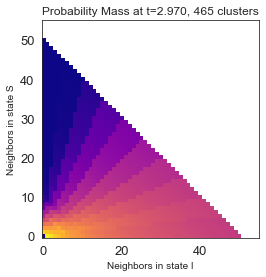

In [31]:
m_to_cluster, cluster_to_m, m_to_weight = get_cluster_maps(clustering)
prints(cluster_to_m)

for timepoint in list(range(101)):
    m_to_value_baseline = m_to_value_t[timepoint]
    dynamics_reduced   #101 rows × 2652 columns
    dyn_o =  dynamics_reduced.to_dict(orient='records')
    dyn_line = dyn_o[timepoint]
    m_to_value = dict()
    for cluster, value in dyn_line.items():
        if 'S' in cluster:
            continue
        cluster = cluster.replace("('I', '", "").replace("')","")
        mlist = cluster_to_m[cluster]
        for m in mlist:  
            #m_to_value[m] = value * m_to_weight[m]
    prints(m_to_value) 

    real_time = str(timepoint/101.0*3) + '00000000000000000000'
    real_time = real_time[:6]
    plot_dyn(m_to_value, 'Reduced 73 Inf   t='+real_time, timepoint/101.0*3)